# Exercise 8 - Polynomial Kernel and Quicksort (19 Points + 9 Bonus Points)

In the event of a persistent problem, do not hesitate to contact the course instructors under
- christoph.staudt@uni-jena.de

### Submission

- Deadline of submission:
        10.06.2022 14:00
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=28746)

# The Dataset

In this exercise we are using a toy [circle dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) from scikit learn

### Task 1 (2 Points)
The dataset does not contain the column of ones to support affine transfomrtions, extend it just as we did in Exercise 3. Moreover the values in `Y` from from $\{0,1\}$ transform them so they come from $\{-1,1\}$, i.e. replaces all 0 with a -1. We will need this formulation in the next tasks

Display the dataset using matplotlib, make sure points to color the points according to their label.

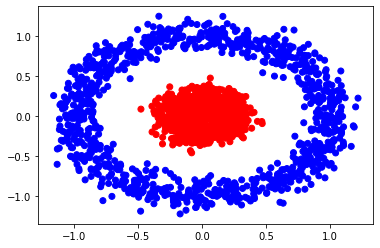

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, Y = datasets.make_circles(n_samples=2000, factor=0.2, noise=0.1, random_state=21)

# TODO: Transform dataset, add an extra column of ones to the first row (i.e. support affine transoformations)
#       and make sure labels are from {-1,1} instead of {0,1}

X = np.insert(X, 0, 1.0, axis=1)
Y = 2 * Y - 1
# NOTE: or Y[Y == 0] = -1, but the mathematical version looked cooler and cleaner

assert np.allclose(Y[0:5], [-1, 1, 1, 1, -1])
assert np.allclose(
    X[0:2],
    [
        [1.0, -0.9432255780054353, -0.2359735089627765],
        [1.0, 0.08792989264545184, 0.1217857184146542],
    ],
)

# TODO: Plot data set, make sure different labels get different colors
plt.scatter(X[:, 1], X[:, 2], c=Y, cmap='bwr')
plt.show()

Each feature in this dataset has one of two possible labels. 
The standard approach for binary classification tasks is logistic regression.

### Task 2 (3 Points)
Use scikit learn to fit logistic regression on the dataset. What is the train- and test accuracy (use `test_size=0.25, random_state=21` for the `train_test_split`)?

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# TODO split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=21)

# TODO: apply logistic regression on trainings set
scikit_lr = LogisticRegression(fit_intercept=False)
scikit_lr.fit(X_train, Y_train)

# TODO: Calculate accuracy
def acc(Y, Y_hat):
    return np.mean(Y==Y_hat)

train_prediction = scikit_lr.predict(X_train)
test_prediction = scikit_lr.predict(X_test)

train_acc = acc(Y_train, train_prediction)
test_acc = acc(Y_test, test_prediction)

print(f"Test Accuracy: {test_acc}\tTrain Accuracy: {train_acc}")
# Get theta from your regression model and print it
theta = scikit_lr.coef_[0]
print(theta)


Test Accuracy: 0.632	Train Accuracy: 0.6986666666666667
[ 0.03866316 -0.03276474 -0.09250418]


### Task 3 (1 Point)

Visualize the predictions made with logistic regression in order to get an understanding on the results. I.e. plot the points colored according to their predicted label, use the whole dataset, test and train, for plotting.

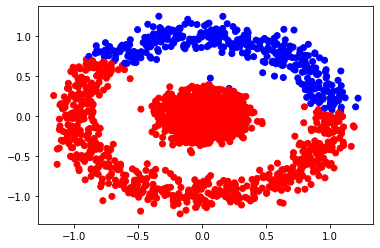

In [30]:
# TODO: visualize predictions
all_prediction = scikit_lr.predict(X)
plt.scatter(X[:, 1], X[:, 2], c=all_prediction, cmap='bwr')
plt.show()

I copied a slightly adjusted `plot_dec_boundary` function over from exercise 3. I also included the sigmoid, acc and predict function. The new `plot_dec_boundary` function expects a function for calculating the probabilities, for some given points. Have a look at this `get_probs` below.

(2499, 3) (3,)


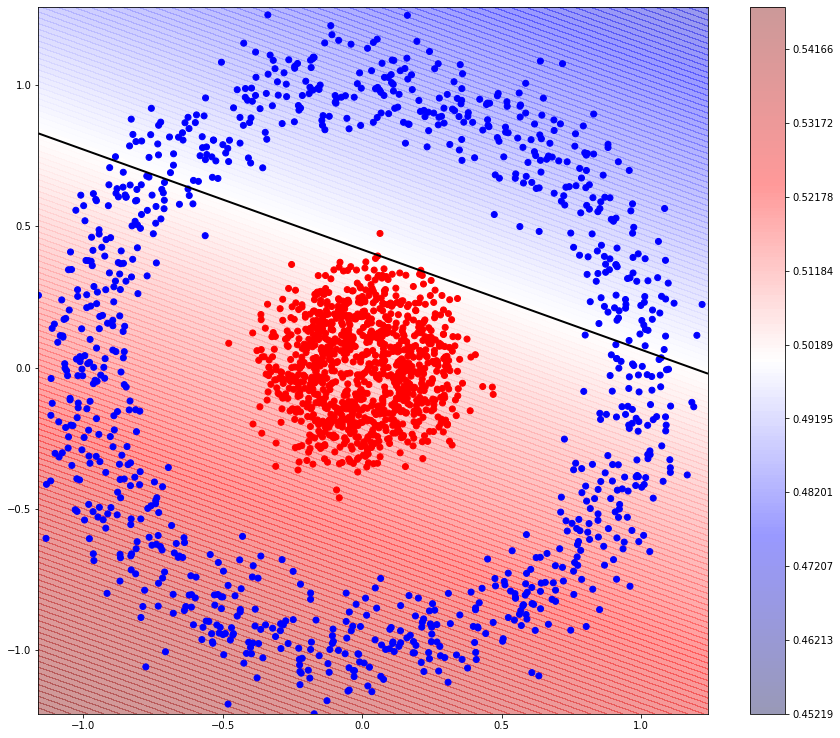

In [31]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


# NOTE: i already copied that and used it for task 2
# def acc(Y, Y_hat):
#     return np.mean(Y == Y_hat)


def predict(X, theta):
    return np.sign(X @ theta)


def get_probs(X, theta):
    print(X.shape, theta.shape)
    return sigmoid(X @ theta)


def plot_dec_boundary(X, Y, get_probs):

    # make these smaller to increase the resolution
    dx, dy = 0.05, 0.05
    levels = np.arange(0.4, 0.6, 2e-3)
    plt.rcParams["figure.figsize"] = (15, 13)
    # generate grids + probs
    x1, x2 = np.mgrid[
        slice(np.min(X[:, 1]), np.max(X[:, 1]) + dy, dy),
        slice(np.min(X[:, 2]), np.max(X[:, 2]) + dx, dx),
    ]
    points = np.stack([np.ones(np.prod(x1.shape)), x1.flatten(), x2.flatten()]).T
    probs = get_probs(points).reshape(x1.shape)
    max_prob = np.max(probs)
    min_prob = np.min(probs)
    dist = max(abs(max_prob - 0.5), abs(min_prob - 0.5))
    step = dist / 100
    levels = np.arange(0.5 - dist - step, 0.5 + dist + step, step)
    # plot points + heatmap
    cmap = plt.get_cmap("seismic")
    plt.contourf(
        x1,
        x2,
        probs,
        cmap=cmap,
        levels=levels,
        alpha=0.4,
    )
    plt.colorbar()
    plt.contour(x1, x2, probs, levels=[0.5], colors="black", linewidths=2)
    plt.scatter(X[:, 1], X[:, 2], c=Y, cmap="bwr")


plot_dec_boundary(X, Y, lambda X: get_probs(X, theta))


Last time we implemented a gradient descent solver for the logistic regression model ourself. For that we needed the gradient of the loss function. As we use a different labeling this time, we can take the vectorized loss function from the script, which reads as:
$$ L(X \theta, y) = \textsf{vec}(1)^\top \log \big(\textsf{vec}(1) + \exp ( -y \odot X \theta) \big)$$

(In the script we had to transpose $X$ here it is already in that transposed from).


We can easily get a gradient for this using: http://www.matrixcalculus.org/. In their notation and replacing $\theta$ with $w$ we get: 

`vector(1)'*log(vector(1)+exp(-y.*(X*w)))`

The tool allows you to download python code for calculating the function and its gradient at a given point in one step. 

### Task 4 (1 Point)
Head over to the page, insert the function definition `vector(1)'*log(vector(1)+exp(-y.*(X*w)))` and download the code. Paste the relevant part into the function below.

In [32]:
def fAndG(X, w, y):
    # TODO: Paste code from matrix calculus
    t_0 = np.exp(-(y * (X).dot(w)))
    t_1 = (np.ones(X.shape[0]) + t_0)
    functionValue = np.sum(np.log(t_1))
    gradient = -(X.T).dot(((t_0 * y) / t_1))
    return functionValue, gradient

f, G = fAndG(X[0:5], np.array([0.36550651, 0.2750498, 0.57661826]), Y[0:5])
assert np.isclose(f, 3.0188193075921217, 0.001)
assert np.allclose(G, np.array([-0.15993363, -1.02165007, -0.06851422]))


Below you find the fit function from exercise 3 adjusted to use the new `fAndG` function:

Iterations: 470
[ 0.03877971 -0.03309781 -0.09334561]


0.6986666666666667

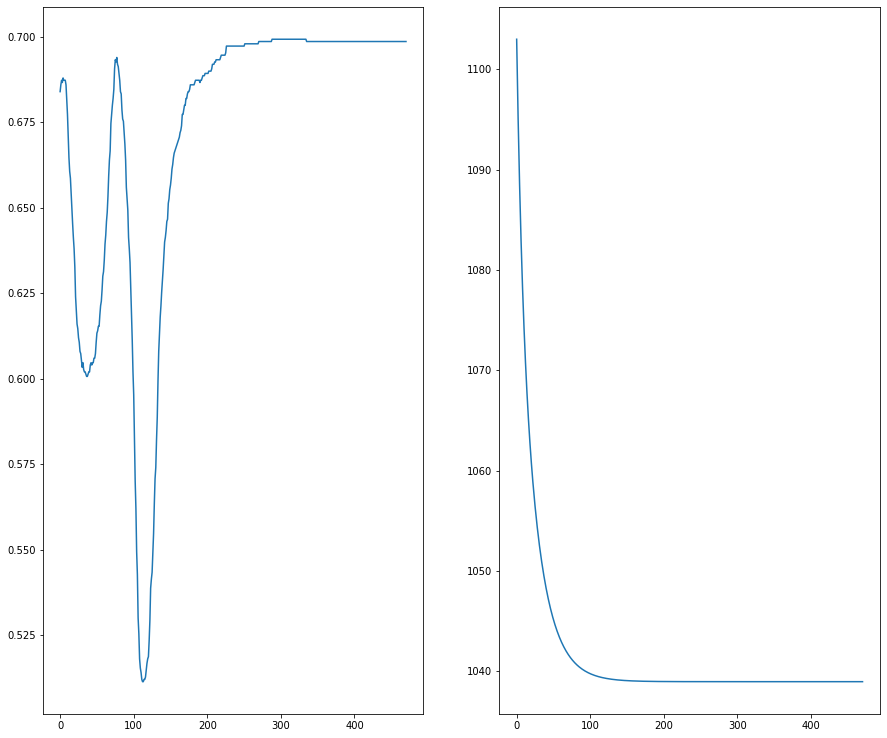

In [33]:
def fit(X, Y, fAndG, lr=2e-4, max_it=15000, eps=1e-8):
    # Init random theta
    theta = np.random.rand(X.shape[1])  # -0.5
    current_loss, grad = fAndG(X, theta, Y)
    accuracies = []
    losses = []
    for it in range(max_it):
        # update
        theta = theta - lr * grad

        # determine accuracy
        Y_hat = predict(X, theta)
        accuracy = acc(Y, Y_hat)

        # Save old loss
        old_loss = current_loss
        # determine new loss and next gradient
        current_loss, grad = fAndG(X, theta, Y)

        # Save values for plotting
        accuracies.append(accuracy)
        losses.append(current_loss)

        # Stop if change in loss got small
        if abs(current_loss - old_loss) < eps:
            break
    print(f"Iterations: {it}")
    return theta, accuracies, losses


theta, accuracies, losses = fit(X_train, Y_train, fAndG)
fig, axs = plt.subplots(ncols=2)
print(theta)
axs[0].plot(accuracies)
axs[1].plot(losses)
acc(Y_train, predict(X_train, theta))

(2499, 3) (3,)


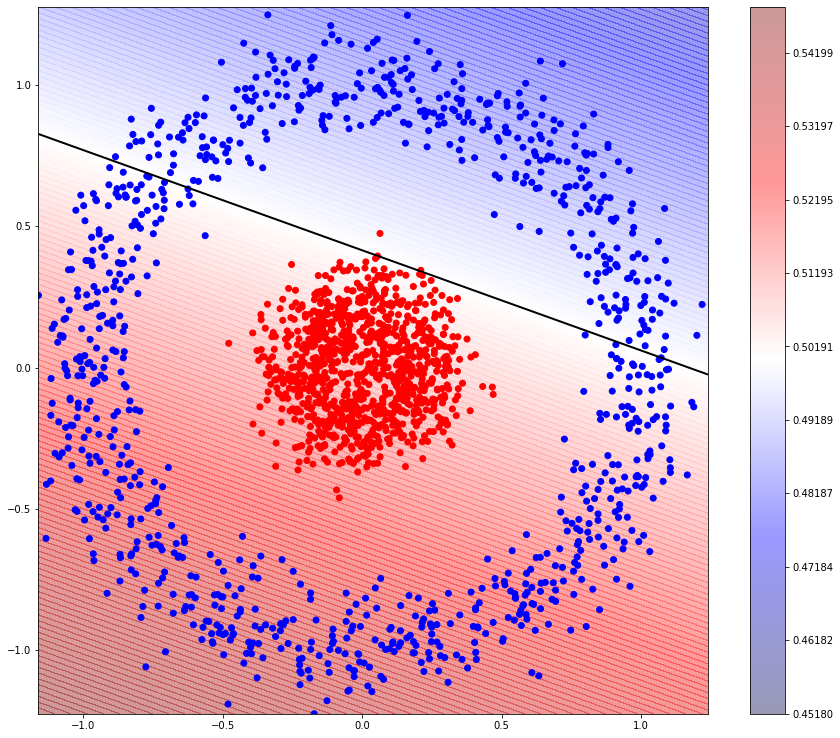

In [34]:
plot_dec_boundary(X,Y,lambda X: get_probs(X,theta))

## The Polynomial kernel

As you can see the result of our own implementation is very similar to the one provided by sklearn. However, for both of them the outer ring gets misclassified, because our linear decision boundary cannot adept to the data correctly.


This is where kernels and feature maps come in. Kernels and feature maps are functions, that map our features into a higher dimensional space, where they can be seperated by a linear regression line. We have already worked with feature maps, but as shown in the lecture kernels can reduce the number of required arithem operations, so we will use the *polynomial kernel* instead of the feature map now: 

$$
k:\mathbb{R}^n\times\mathbb{R}^n \rightarrow \mathbb{R},\:
(x^{(1)},x^{(2)})\mapsto  \left( {x^{(1)}}^\top x^{(2)} +1\right)^d.
$$

(Note that as usual vectors are assumed to be column vectors, but observations in our $X$ are *row* vectors!)

An immediate consequence of the representer theorem (see lecture notes) is that we can
optimize over $a\in\mathbb{R}^m$ instead of $\theta\in\mathbb{R}^n$,
namely by substituting $\theta=X a$ in the original optimization
problem, which results in an equivalent *adjoint* formulation:
$$
\hat a \,=\, \argmin_{a\in\mathbb{R}^m} \: L(XX^\top a, y) + c\cdot a^\top XX^\top a
$$

(note in contrast to above we added some regularization here)

The so called *kernel trick* just means replacing the Gram matrix $X X^\top$ by
the kernel matrix
$$
K \,=\, \Big( k(x^{(i)},x^{(j)}) \Big)_{i,j\in [m]} = \left(\left( {x^{(i)}}^\top x^{(j)} +1\right)^d\right)_{i,j\in [m]}.
$$

After this
replacement, the adjoint problem reads as:
\begin{align*}
\hat a \,&=\argmin_{a\in\mathbb{R}^m}\: L(Ka, y) + c\cdot a^\top Ka  \\
 &=\argmin_{a\in\mathbb{R}^m}\: \textsf{vec}(1)^\top\log(\mathrm{vector}(1)+\exp((-y)\odot (K\cdot a)))+c\cdot a^\top \cdot K\cdot a 
\end{align*}

We will now implement the kernel matrix, a predict function, derive a gradient for the new loss function and solve the adjoint problem with the Kernel matrix using an adjusted gradient descent.

### Task 5 (2 Points)

Implement a function that takes to two matrices $X_1$, $X_2$ and the degree of the polynom $d$. It should return their polynomial kernel matrix of degree $d$. We will need this more generalized setting for the prediction in the next task.

In [35]:
def kernel(X1, X2, d):
    # TODO: Implement polynomial kernel
    # NOTE: this passes the assertions, but the (+ 1) is missing!
    return np.power(X1 @ X2.T, d)

M = np.arange(12).reshape(4, 3)
assert np.allclose(
    kernel(M, M, 2),
    [
        [25, 196, 529, 1024],
        [196, 2500, 7396, 14884],
        [529, 7396, 22201, 44944],
        [1024, 14884, 44944, 91204],
    ],
)
assert np.allclose(
    kernel(M, M, 3),
    [
        [125, 2744, 12167, 32768],
        [2744, 125000, 636056, 1815848],
        [12167, 636056, 3307949, 9528128],
        [32768, 1815848, 9528128, 27543608],
    ],
)


### Task 6 The predictor (2 Points)
In the lecture we saw that the predictor for the adjoint problem can be expressed like this:

$$
h:\mathcal{X} \rightarrow \{\pm 1\},\: x \mapsto
  \begin{cases} 1 &
    \sum_{i=1}^m \hat a_i\, k(x,x^{(i)}) \,\geq\, 0 \\[2pt]
    -1 & \textsf{otherwise}
  \end{cases}
$$

If we look at $\sum_{i=1}^m \hat a_i\, k(x,x^{(i)})$, we see that this is a scalar product between a and the vector $(k(x,x^{(i)}))_{i\in [m]}$, which we can create with `kernel(x,X)`. In fact we can replace the single vector `x` with a stack of $p$ vectors (i.e. a matrix) and multiply that with $a$ to get several values for predictions with one operation. Therefore, implement a function predict that takes such a matix $K\in \mathbb{R}^{p\times m}$ (which was generated by `kernel`) and an estimated $a$ and returns the predicted labels.

In [36]:
def predict(K, a):
    # TODO: implement predict
    return np.sign(K @ a)

K = kernel((np.arange(9).reshape(3, 3) - 4.5) / 9, M, 2)
print(predict(K, np.array([3, 0.2, -0.3, 0.1])))
assert np.allclose(predict(K, np.array([3, 0.2, -0.3, 0.1])), np.array([1, -1, 1]))


[ 1. -1.  1.]


### Task 7 (2 Points)

As mentioned above the new objective function reads as:

$$\textsf{vec}(1)^\top\log(\mathrm{vector}(1)+\exp((-y)\odot (K\cdot a)))+c\cdot a^\top \cdot K\cdot a$$

Head over to http://www.matrixcalculus.org/ and transform the function to match their notation. Download the python code and copy the relevant function to this notebook below.

In [37]:
def fAndG_poly(K, a, c, y):
    # TODO: copy & paste function body from downloaded code
    assert isinstance(K, np.ndarray)
    dim = K.shape
    assert len(dim) == 2
    K_rows = dim[0]
    K_cols = dim[1]
    assert isinstance(a, np.ndarray)
    dim = a.shape
    assert len(dim) == 1
    a_rows = dim[0]
    if isinstance(c, np.ndarray):
        dim = c.shape
        assert dim == (1, )
    assert isinstance(y, np.ndarray)
    dim = y.shape
    assert len(dim) == 1
    y_rows = dim[0]
    assert K_rows == y_rows == a_rows
    assert a_rows == K_rows == K_cols
    assert a_rows == K_rows == y_rows == K_cols
    
    t_0 = (K).dot(a)
    t_1 = np.exp(-(y * t_0))
    # print(f"y: {y}")
    # print(f"K: {K}")
    # print(f"a: {a}")
    # print(f"t_0: {t_0}")
    # print(f"power: {-(y * t_0)}")
    # print(f"t_1: {t_1}")
    t_2 = (np.ones(K_rows) + t_1)
    functionValue = (np.sum(np.log(t_2)) + (c * (a).dot(t_0)))
    gradient = (((c * t_0) - (K.T).dot(((t_1 * y) / t_2))) + (c * (K.T).dot(a)))
    return functionValue, gradient

f, G = fAndG_poly(
    np.array(
        [
            [3.7844177012259865, 0.7891196584397753, 0.9029368253328784],
            [0.7891196584397753, 1.0456359627092107, 0.9634124453522385],
            [0.9029368253328784, 0.9634124453522385, 1.136054990935599],
        ]
    ),
    np.array([0.36550651, 0.2750498, 0.57661826]),
    0.001,
    Y[0:3],
)
assert np.isclose(f, 2.7674497328693235, 0.001)
assert np.allclose(
    G, np.array([2.989908913027514, 0.2373421163827483, 0.3208161644797845])
)


### Task 8 (4 Points)

Now use the new function `fAndG_poly` to adjust the fit function from above to the `fit_poly` function. Note that you need to calculate the Kernal matrix $K$ only once.

Iterations: 665
1.0 17.060570374760506


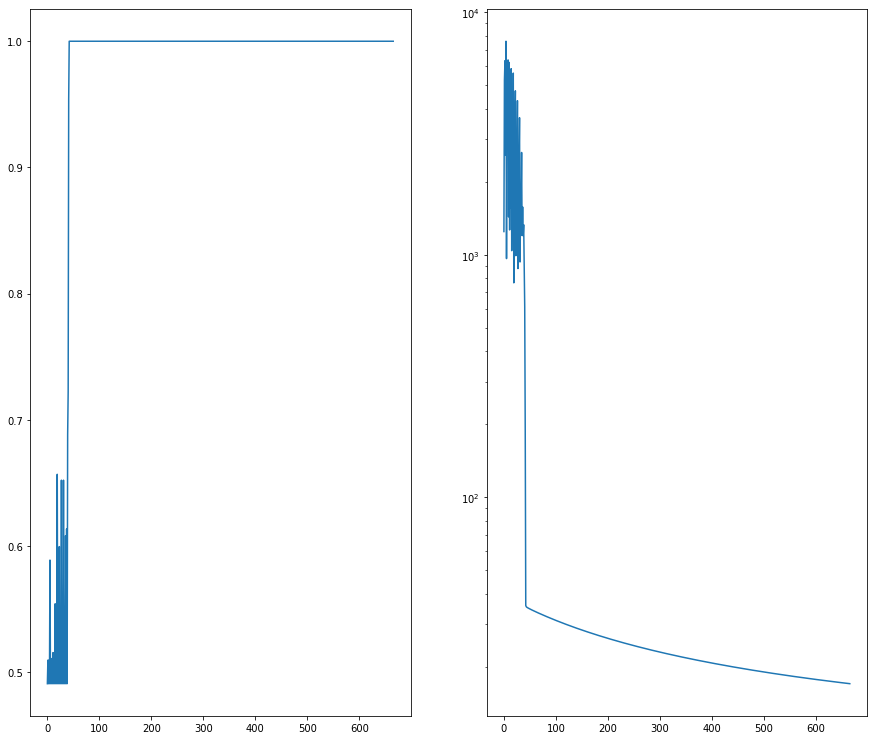

In [38]:
def fit_poly(X, Y, d, fAndG, c=1e-2, lr=1e-5, max_it=1000,eps=1e-2):
    K = kernel(X, X, d)
    # Init random a (i'm going with 0 because np.random.rand produces really big numbers)
    a = np.zeros(K.shape[1])
    current_loss, grad = fAndG(K, a, c, Y)
    accuracies = []
    losses = []
    for it in range(max_it):
        # update
        a = a - lr * grad

        # determine accuracy
        Y_hat = predict(K, a)
        accuracy = acc(Y, Y_hat)

        # Save old loss
        old_loss = current_loss
        # determine new loss and next gradient
        current_loss, grad = fAndG(K, a, c, Y)

        # Save values for plotting
        accuracies.append(accuracy)
        losses.append(current_loss)

        # Stop if change in loss got small
        if abs(current_loss - old_loss) < eps:
            break
    print(f"Iterations: {it}")
    return a, accuracies, losses

d = 2
a,accuracies,losses = fit_poly(X_train,Y_train,d,fAndG_poly)
print(np.max(accuracies),np.min(losses))

fig, axs = plt.subplots(ncols=2)
plt.yscale('log')
axs[0].plot(accuracies)
axs[1].plot(losses)

assert np.isclose(accuracies[-1],1,0.0001)


### Task 9 (2 Points)

For the visualization we need a function that computes the probabilities which works similar to the prediction. We have:
$$p(Y=1|x) = \sigma \left(\sum_{i=1}^m \hat a_i\, k\left(x,x^{(i)}\right)\right).$$
Just like before when we implemented the predict function, we can vectorize the expression to compute the probabilities for several points at once. The resulting function takes the training data `X_train`, a matrix `X` whose rows are points at which the probability should be computed, the estimated parameter vector `a` and the degree of the kernel `d`.

In [39]:
def get_probs_poly(X_train,X,a,d):
    # TODO: Calculate probabilities
    K = kernel(X, X_train, d)
    return sigmoid(K @ a)

assert np.allclose(get_probs_poly(X_train, np.array([[1,0,0],[1,1,1]]),a,2), [0.9960399369232896, 6.794042866293732e-09],0.001)

As we will see now we can properly predict all points:

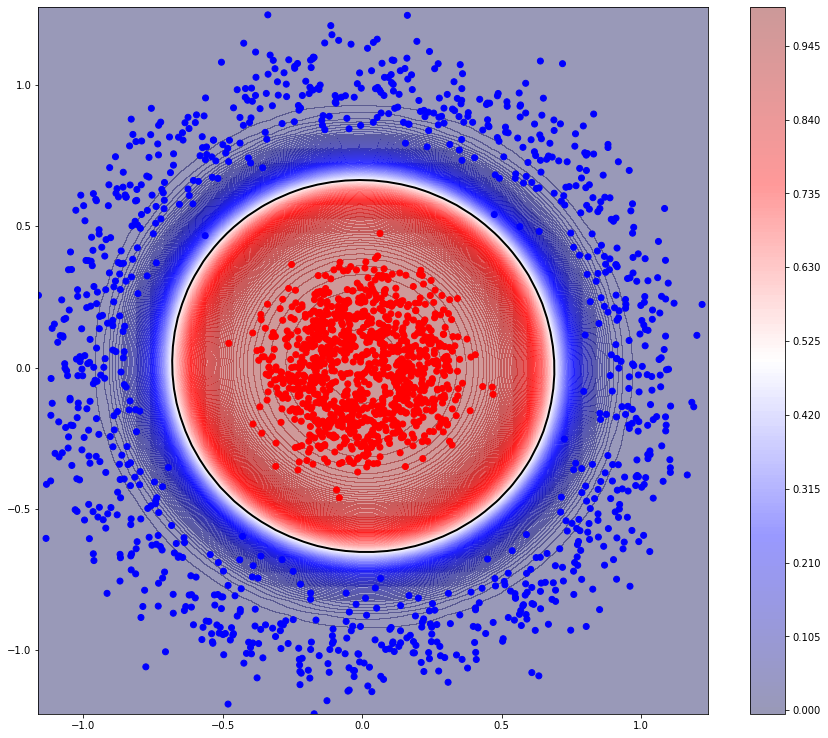

In [40]:
plot_dec_boundary(X,Y,lambda X: get_probs_poly(X_train,X,a,d))

# Randomized Quicksort and the PAC framework (Bonus points)

(The following is an extract from the newest version of the lecture notes)

The probably approximately correct idea can also be applied in the
analysis of randomized algorithms. Here we illustrates this on the
example of Quicksort with a randomized pivot strategy.

Quicksort sorts keys, that is, elements from an ordered domain, that
are stored in an array $A$ in ascending order. Here, we assume that
the stored keys are unique and that the number of stored keys is $n$.

Quicksort recursively performs the following operations, first it
chooses a pivot element among the stored keys and then partitions the
array into three parts, namely, the left part that stores all keys
that are smaller than the pivot, the right part that stores all keys
that are larger than the pivot, and the middle part that stores the
pivot. After partitioning the pivot is already stored at its final
position in the array. If the rank of the pivot is $r$, that is, $r-1$
keys in the array are smaller than the pivot, then the first part
stores $r-1$ keys, the second part stores $n-r$ keys, and the third
part stores one key, namely, the pivot. Quicksort recursively
continues on the left and right parts as long as these parts store
more than one key.

The running time of Quicksort is the sum of the cost of the partition
steps over all recursions. The cost of each partition step is
proportional to the size of the array, that is, to the number of keys
that to be partitioned. The running time essentially depends on the
recursion depth, because, independently of the choice of pivot, the
partition cost on recursion depth $i$ is at most two less than on
recursion depth $i-1$, namely, one less for the pivot that does not have
to be considered any longer plus one if either the right of left part
also contains one key. Hence, for a sub-linear recursion depth the
cost of the partition step on each recursion step is still in $\Omega
(n)$.

The recursion depth is minimized if the pivot is always the median of
the keys that need to be partitioned. In this case the recursion depth
is at most $\lceil \log_2 (n)\rceil$. The median can be computed in
time $\Theta (n)$, that is, in asymptotically the same time that is
required in the partition step. Thus, asymptotically the running time
for Quicksort with the median pivot strategy is in $\Theta (n\log
n)$. This asymptotic running time can not be improved, even when we
get the pivot in only constant time. However, the constant that is
hidden in the big-O notation for the median computation is fairly
large and real-world implementations of Quicksort can benefit
significantly from faster to compute pivots. One such strategy is to
choose the pivot uniform at random from the keys to be partitioned.

In the following we show that the randomized pivot strategy is
probably approximately optimal, that is, we show that the recursion
depth is only larger by some factor $c >1$ with high probability. As
in PAC learning, for a constant number of data points, we can
trade-off the approximation factor, which is additive in the PAC case,
and the success probability.


**Theorem 12** For $k>7$, the recursion depth of Quicksort with randomized
pivot strategy is at most $\lfloor k\cdot\log n\rfloor$ with
probability at least
$$
1 \,-\, n^{1-(k-7)^2/2k}.
$$


For the proof we fix some key in the array and track the subarrays
that contain this element over the recursions of the algorithm. Let
$A_i$ be the array on recursion depth $i$ that contains the fixed
key. We have $A_1=A$ and want to determine the recursion depth $d$
for which the size of $A_d$ becomes smaller than $4$.  Note that two
recursions are always sufficient for sorting arrays of size less
than $4$.

We call a recursion depth $i$ *good* if either the size $|A_i|$
of $A_i$ is less than $4$ or if the rank $r$ of the pivot in $A_i$
satisfies
$$
\left\lfloor \frac{|A_i|}{4} \right\rfloor \,<\, r \,\leq\,
\left\lceil \frac{3\cdot |A_i|}{4} \right\rceil.
$$
Since the pivot is chosen uniformly at random, the probability of
$A_i$, with $|A_i|\geq 4$, being good is at least $1/2$. This
probability is maximized for $|A_i|=7$, where it becomes $5/7$. In
this case, the larger of the two subarrays on which the recursion
continues has size five, that is, $\frac{5}{7}\cdot 7 =5$. That is,
in each iteration the size of the larger subarray is at most
$5/7$-times the current array size. Thus, we can bound the number of
good recursion depths before the size of the array that contains the
fixed key becomes smaller than $4$ by $(5/7)^d \cdot n < 4$ which
gives
$$
d \log (5/7) \,<\, \log (4/n) \quad\textsf{or, equivalently}\quad d
\,\geq \frac{\log n - \log (4)}{\log (7/5)}.
$$
Since $1/\log (7/5)< 3$ and $\log (4)/\log (7/5) > 4$ the latter
inequality for $d$ is implied by $d \geq 3\log n - 2$. In the
following we aim for even more namely $d \geq 3\log n$ good
recursion depths. The additional two good recursion depths are
enough to compensate for the two recursion depths that are necessary
to sort arrays of size less than $4$.



Now, let $m= \lfloor k\cdot\log n\rfloor$ and $X_i$ be a random
variable that takes values in $\{\pm 1\}$ with probability
$\frac{1}{2}$ each and let
$$
S_m \,=\, \sum_{i=1}^m X_i,
$$
then $\textsf{E}[S_m] =0$ and $S_m$ is an upper bound on the number
of not good minus the number of good depths among $m$ recursion
depths, that is,
\begin{align*}
\hat S_m \,&=\, \sum_{i=1}^m \Big( {\bf 1}[i \textsf{ is not good}] \,-\,
    {\bf 1}[i \textsf{ is good}] \Big) \\
    &=\, \sum_{i=1}^m \Big( {\bf 1}[i \textsf{ is not good}] \,+\,
    {\bf 1}[i \textsf{ is good}] \Big) \,-\,
    2\cdot \sum_{i=1}^m {\bf 1}[i \textsf{ is good}] \\
    &=\, m - 2\cdot \sum_{i=1}^m {\bf 1}[i \textsf{ is good}].
\end{align*}
Where we used an additive zero  $\left(\text{added }{\bf 1}[i \textsf{ is good}] - {\bf 1}[i \textsf{ is good}]\right)$ in the second equality.
Since we need at least $3\log n$ good recursion depths we need to
bound the probability that $\hat S_m$ is larger than $m- 2\cdot
3\log n = m-6\log n$, that is, having fewer than $3\log n$ good
depths among $m$ recursion depths. Using Hoeffding's inequality we
get that
\begin{align*}
\textsf{P}\left[ \hat S_m \geq m-6\cdot\log n \right] \,
&<\, \textsf{P}\big[ S_m \geq m-6\cdot\log n \big] \\
&\leq\, \exp \left( -\frac{2(m-6\cdot\log n)^2}{4m}\right) \\
&\leq\, \exp \left( -\frac{(m-6\cdot\log n)^2}{2m}\right) \\
&\leq\, \exp \left( -\frac{((k-7)\cdot\log n)^2}{2k\cdot\log n}\right) \\
&\leq\, \exp \left( -\frac{(k-7)^2}{2k}\log n\right)
\,=\, n^{-(k-7)^2/2k}.
\end{align*}
The claim of the theorem now follows from a union bound over all the
$n$ keys in the array (sum up the prob above n times) and taking complement, because once all keys are in arrays of size
$1$, the recursion stops.




Note that the bound that is given in the theorem is pessimistic in the
sense that, in the proof, we sometimes bounded quantities fairly
generously. However, even this pessimistic bound gives good results
which can be illustrated by plugging in specific values for $k$. We
get the first meaningful bound for $k=12$ since $1-(12-7)^2/24 =
1-25/24 < 0$, that is, the bound gets better with growing $n$. For
$k=15$, the bound already becomes $1-n^{-3}$. Note that $k\cdot \log n
/\log_2 n = k\cdot \log 2 \approx 0.7\cdot k >1$ is the approximation
factor with respect to the best possible number of iterations for
Quicksort that is achieved by the median pivot rule. Thus, the
randomized pivot rule can achieve fairly small approximation factors
with fairly large success probability. Remember that it pays off, in
terms of running time, to switch to the randomized pivot strategy when
the approximation factor is smaller than the constant hidden in the
big-O notation for the running time of the algorithm that is used for
computing the median.



### Task 10 (2 Points)

The theorem gives a bound on the recusrion depth and a probability for how likely this bound holds. Implement two functions that compute those values given a number of elements $n$ and parameter $k$.


In [41]:
import numpy as np

def recursion_depth_bound(n,k):
    # TODO: Compute recursion depth bound
    return np.floor(k * np.log(n))

def bound_probability(n,k):
    # TODO: Compute probability bound
    return 1 - n ** (1 - (k - 7)**2 / (2 * k))


assert recursion_depth_bound(500,14) == 87
# NOTE: am i already wrong here? my calculator also said 0.9905425839099682
print(bound_probability(500,14))
# assert bound_probability(500,14) == 0.9999810851678199

0.9905425839099682


### Task 11 (3 Points)

Below you will find an implementation of quicksort, but you will need to adept it so it returns the maximum recursion depth.

In [42]:
import random

def quicksort(array, first=0, last=None):
    # Check if it was called without last, just take the end of the array
    if last == None:
        last = len(array) - 1

    # If first >= last we hit the end of the recursion, so we are done
    if first >= last:
        return 0

    # Pick random pivot element
    pivot = array[random.randint(first, last)]

    # Init sort "pointers"
    i, j = first, last

    # While i is left of j
    while i < j:
        # Increase i until an element needs to be swapped
        while i < last and array[i] < pivot:
            i += 1

        # Decrease j until an element needs to be swapped
        while j > first and array[j] > pivot:
            j -= 1

        # Check if i is still left from j
        if i <= j and array[i] > array[j]:
            # If so swap the elements at i and j
            array[i], array[j] = array[j], array[i]

    pivot_index = array.index(pivot)

    # Run quicksort on sub parts
    return max(quicksort(array, first, pivot_index - 1), quicksort(array, pivot_index + 1, last)) + 1


random.seed(0)
assert quicksort(list(range(500))) == 20


### Task 12 (4 Points)

1. Now generate a list with $n=1000$ elements and run quicksort on it 200 times and store the resulting recursion depths in a list. 
2. Compute and print the minimum, maximum and mean recursion depth. Also print `recursion_depth_bound` and `bound_probability` for $k=12$ and $k=15$. 
3. Plot the recusion depth in a diagram, the x-axis should be the number of the run of quicksort and the y axis the recursion depth for that run. Also add a horizontal line for the mean and the depth bound for $k=12$

min:	17
max:	26
mean:	21.125
k = 12:
depth bound = 82.0
bound probability = 0.25010579066754457
k = 15:
depth bound = 103.0
bound probability = 0.9996018928294464


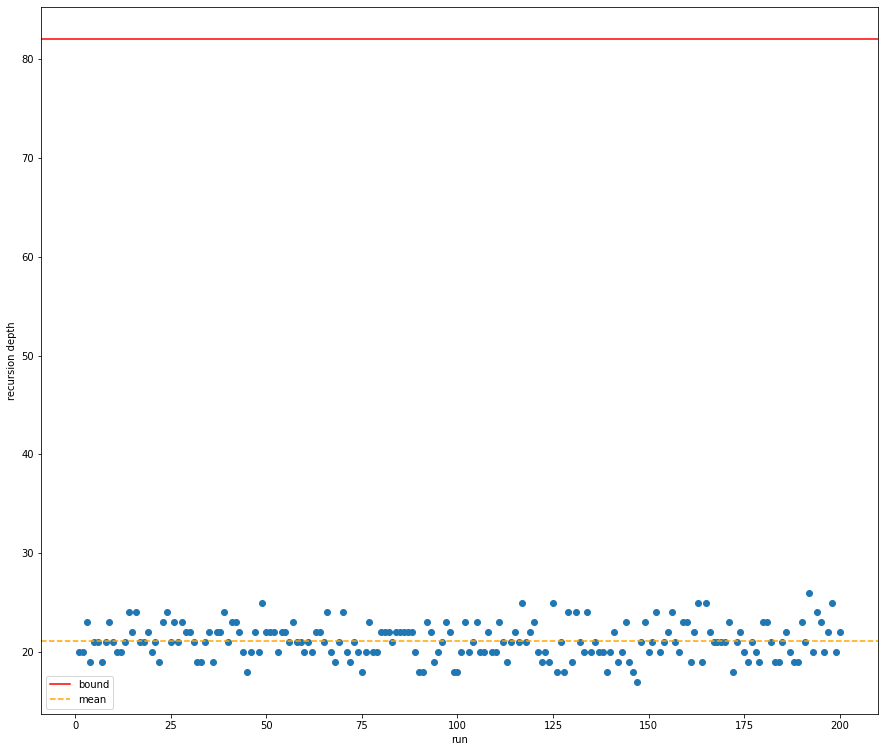

In [43]:
import matplotlib.pyplot as plt


n = 1000

# TODO: Generate list with 1000 elements for sorting
random.seed(0)
random_array = list(np.random.rand(n))

# TODO: Run quicksort 200 times and store resulting recursion depths in a list
n_tests = 200
depths = [0] * n_tests
for i in range(n_tests):
    copied_array = random_array
    depths[i] = quicksort(copied_array)

# TODO: get min, max and mean of recursion depth list and print them
print(f"min:\t{np.min(depths)}\nmax:\t{np.max(depths)}\nmean:\t{np.mean(depths)}")

# TODO: Compute and print recursion_depth_bound and bound_probability for k=12 and k=15
for k in [12, 15]:
    print(f"k = {k}:\ndepth bound = {recursion_depth_bound(n, k)}\nbound probability = {bound_probability(n, k)}")

# TODO: Plot depths, mean and depth bound for k=12
plt.scatter(np.arange(n_tests) + 1, depths)
plt.axhline(y=recursion_depth_bound(n, 12), color="red", label="bound")
plt.axhline(y=np.mean(depths), color="orange", linestyle="--", label="mean")
plt.ylabel("recursion depth")
plt.xlabel("run")
plt.legend()
plt.show()